In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

In [2]:
file_name = 'https://raw.githubusercontent.com/Rashini92/ML_Foundation-CapstoneProject/master/loan_train_data.csv'
data = pd.read_csv(file_name)
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
93,LP001322,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y
568,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
139,LP001493,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,N
214,LP001716,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
480,LP002534,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
516,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,Y
193,LP001658,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban,Y
526,LP002705,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
d = data.describe(include='all')
d.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001213,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

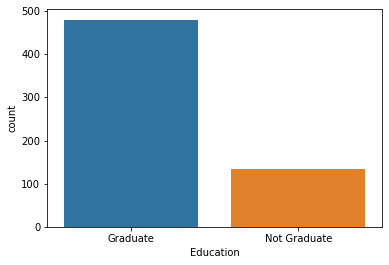

In [9]:
#data['Education'].value_counts().plot(kind='bar')
sns.countplot(x ='Education', data = data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

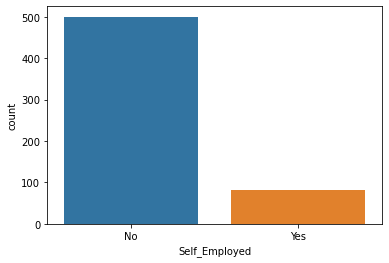

In [10]:
#data['Self_Employed'].value_counts().plot(kind='bar')
sns.countplot(x ='Self_Employed', data = data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

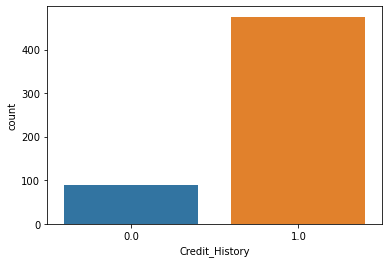

In [11]:
#data['Credit_History'].value_counts().plot(kind='bar')
sns.countplot(x ='Credit_History', data = data)

In [12]:
data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
data['Credit_History'] = data["Credit_History"].fillna(data['Credit_History'].mode()[0])

In [13]:
data['is_male'] = np.where(data["Gender"]=='Male',1,0)
data['is_Married'] = np.where(data["Married"]=='Yes',1,0)
data['is_Self_Employed'] = np.where(data["Self_Employed"]=='Yes',1,0)
data['Credit_History_availability'] = np.where(data["Credit_History"]==1.0,1,0)
data['is_graduate'] = np.where(data["Education"]=='Graduate',1,0)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

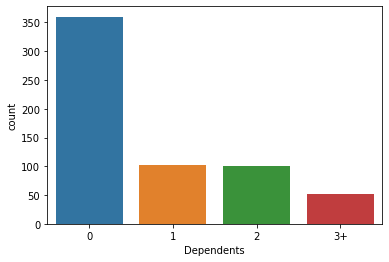

In [14]:
sns.countplot(x ='Dependents', data = data)

In [15]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

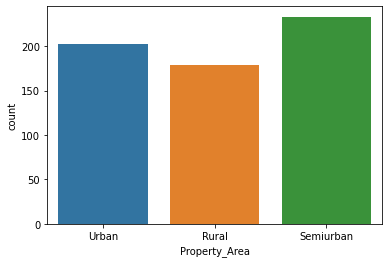

In [16]:
#data['Property_Area'].value_counts().plot(kind='bar')
sns.countplot(x ='Property_Area', data = data)

In [17]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [18]:
data.isnull().sum()

Loan_ID                         0
Gender                          0
Married                         0
Dependents                      0
Education                       0
Self_Employed                   0
ApplicantIncome                 0
CoapplicantIncome               0
LoanAmount                     22
Loan_Amount_Term               14
Credit_History                  0
Property_Area                   0
Loan_Status                     0
is_male                         0
is_Married                      0
is_Self_Employed                0
Credit_History_availability     0
is_graduate                     0
dtype: int64

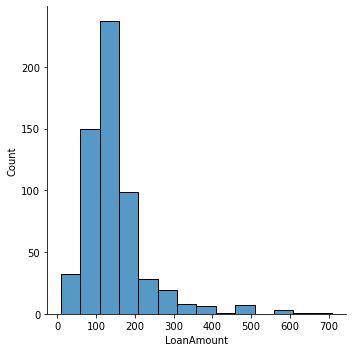

In [19]:
sns.displot(data, x="LoanAmount",binwidth=50)

<AxesSubplot:xlabel='LoanAmount'>

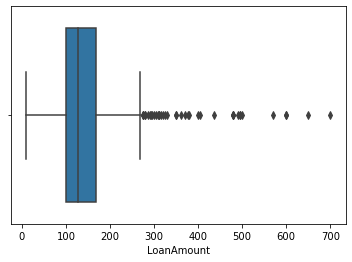

In [20]:
sns.boxplot(x="LoanAmount", data=data)

In [21]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Due to the presence of many outliers in the variable, a masure which does not effect from the outliers has been chosen. which is the median.

In [22]:
data['LoanAmount'] = data["LoanAmount"].fillna(data['LoanAmount'].median()).astype(int)

In [23]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

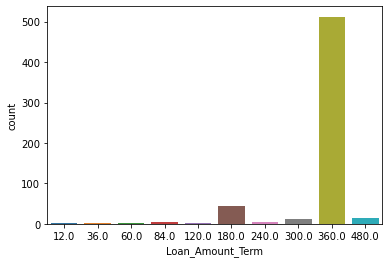

In [24]:
sns.countplot(data=data, x="Loan_Amount_Term")

In [25]:
data['Loan_Amount_Term'] = data["Loan_Amount_Term"].fillna(data['Loan_Amount_Term'].mode()[0]).astype(int)

In [26]:
data['Loan_Amount_Term'].value_counts()

360    526
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
labels = ['<90', '90-180', '180-360', '>360']
bin_edges = [0, 90, 180, 360, np.inf]

data['Loan_Amount_Term_grp'] = pd.cut(x=data['Loan_Amount_Term'], bins=bin_edges, labels=labels)
data['Loan_Amount_Term_grp'].value_counts()

180-360    543
90-180      47
>360        15
<90          9
Name: Loan_Amount_Term_grp, dtype: int64

In [28]:
data.isnull().sum()

Loan_ID                        0
Gender                         0
Married                        0
Dependents                     0
Education                      0
Self_Employed                  0
ApplicantIncome                0
CoapplicantIncome              0
LoanAmount                     0
Loan_Amount_Term               0
Credit_History                 0
Property_Area                  0
Loan_Status                    0
is_male                        0
is_Married                     0
is_Self_Employed               0
Credit_History_availability    0
is_graduate                    0
Loan_Amount_Term_grp           0
dtype: int64

In [29]:
#pd.crosstab(data['Loan_Status'], data['Credit_History'], margins=True, margins_name='Total')
#sns.countplot(data=data, x='', hue='Loan_Status')

In [30]:
data = data.join(pd.get_dummies(data['Loan_Amount_Term_grp'], prefix='Loan_Term'))
data = data.join(pd.get_dummies(data['Property_Area'], prefix='Property_Area'))
data = data.join(pd.get_dummies(data['Dependents'], prefix='Dependents'))

In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Term_90-180,Loan_Term_180-360,Loan_Term_>360,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,...,0,1,0,0,0,1,1,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,...,0,1,0,1,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,...,0,1,0,0,0,1,1,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,...,0,1,0,0,0,1,1,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,...,0,1,0,1,0,0,1,0,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,...,1,0,0,1,0,0,0,0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,...,0,1,0,0,0,1,0,1,0,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,...,0,1,0,0,0,1,0,0,1,0


In [32]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'is_male', 'is_Married', 'is_Self_Employed',
       'Credit_History_availability', 'is_graduate', 'Loan_Amount_Term_grp',
       'Loan_Term_<90', 'Loan_Term_90-180', 'Loan_Term_180-360',
       'Loan_Term_>360', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

In [33]:
data['y_act'] = np.where(data['Loan_Status']=='Y',1,0)

In [34]:
data[['Loan_Status','y_act']]

,Loan_Status,y_act
0,Y,1
1,N,0
2,Y,1
3,Y,1
4,Y,1
...,...,...
609,Y,1
610,Y,1
611,Y,1
612,Y,1


,y_act,ApplicantIncome,CoapplicantIncome,LoanAmount,is_male,is_Married,is_Self_Employed,Loan_Amount_Term,Credit_History_availability,is_graduate,...,Loan_Term_90-180,Loan_Term_180-360,Loan_Term_>360,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
y_act,1.000000,-0.004710,-0.059187,-0.033214,0.017987,0.091478,-0.003700,-0.022549,0.540556,0.085884,...,-0.004003,0.052710,-0.098067,-0.100694,0.136540,-0.043621,-0.003044,-0.038740,0.062384,-0.026123
ApplicantIncome,-0.004710,1.000000,-0.116605,0.565181,0.058809,0.051708,0.127180,-0.046531,-0.018615,0.140760,...,0.059453,-0.028023,-0.026042,0.015829,-0.014246,-0.000598,-0.092599,0.040861,-0.034650,0.156687
CoapplicantIncome,-0.059187,-0.116605,1.000000,0.189218,0.082912,0.075948,-0.016100,-0.059383,0.011134,0.062290,...,0.078269,-0.046291,-0.032920,0.005329,-0.027044,0.022776,-0.008292,-0.029769,0.010016,0.041491
LoanAmount,-0.033214,0.565181,0.189218,1.000000,0.106904,0.146546,0.115100,0.036960,-0.000607,0.168759,...,-0.024154,0.024085,0.011388,0.043467,-0.005804,-0.036050,-0.147639,0.061976,0.020126,0.152850
is_male,0.017987,0.058809,0.082912,0.106904,1.000000,0.364569,-0.000525,-0.074030,0.009170,-0.045364,...,0.088405,-0.052108,-0.034526,0.080283,-0.108623,0.034530,-0.148421,-0.004466,0.129953,0.096319
is_Married,0.091478,0.051708,0.075948,0.146546,0.364569,1.000000,0.004489,-0.100912,0.010938,-0.012304,...,0.094007,-0.038844,-0.084144,-0.006805,0.005845,0.000546,-0.348175,0.113853,0.249547,0.132566
is_Self_Employed,-0.003700,0.127180,-0.016100,0.115100,-0.000525,0.004489,1.000000,-0.033739,-0.001550,0.010383,...,-0.004986,0.007218,-0.031114,0.022065,0.008710,-0.030338,-0.088254,0.082044,0.032434,0.003278
Loan_Amount_Term,-0.022549,-0.046531,-0.059383,0.036960,-0.074030,-0.100912,-0.033739,1.000000,-0.004705,0.073928,...,-0.743479,0.655934,0.338215,0.034321,0.059141,-0.094279,0.118163,-0.088492,-0.010609,-0.077273
Credit_History_availability,0.540556,-0.018615,0.011134,-0.000607,0.009170,0.010938,-0.001550,-0.004705,1.000000,0.073658,...,-0.055459,0.053649,-0.054711,-0.020906,0.035976,-0.016934,0.020500,0.009757,0.007987,-0.060473
is_graduate,0.085884,0.140760,0.062290,0.168759,-0.045364,-0.012304,0.010383,0.073928,0.073658,1.000000,...,-0.099997,0.092536,-0.018553,-0.077520,0.039410,0.034279,0.036563,0.013355,-0.020822,-0.055288


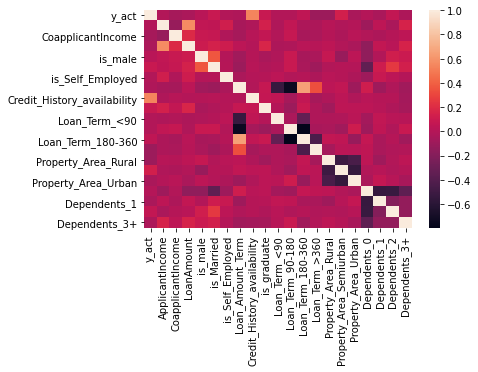

In [35]:
correlation_matrix = data[['y_act','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'is_male', 'is_Married', 'is_Self_Employed','Loan_Amount_Term',
       'Credit_History_availability', 'is_graduate', 'Loan_Amount_Term_grp',
       'Loan_Term_<90', 'Loan_Term_90-180', 'Loan_Term_180-360',
       'Loan_Term_>360', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [36]:
X_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'is_Married',
                   'Credit_History_availability', 'is_graduate','Loan_Term_180-360','Loan_Term_>360', 'Property_Area_Rural',
                   'Property_Area_Semiurban', 'Dependents_2']
data[X_variables].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,is_Married,Credit_History_availability,is_graduate,Loan_Term_180-360,Loan_Term_>360,Property_Area_Rural,Property_Area_Semiurban,Dependents_2
0,5849,0.0,128,0,1,1,1,0,0,0,0
1,4583,1508.0,128,1,1,1,1,0,1,0,0
2,3000,0.0,66,1,1,1,1,0,0,0,0
3,2583,2358.0,120,1,1,0,1,0,0,0,0
4,6000,0.0,141,0,1,1,1,0,0,0,0


In [37]:
X = data[X_variables].values
X

array([[5.849e+03, 0.000e+00, 1.280e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.583e+03, 1.508e+03, 1.280e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [38]:
y_varibale = 'y_act'
data[y_varibale].head()

0    1
1    0
2    1
3    1
4    1
Name: y_act, dtype: int32

In [39]:
y = data[y_varibale].values
y[:5]

array([1, 0, 1, 1, 1])

# Data Pre-processing Function

In [40]:
def pre_processing(data):  
    
    #fill null values
    data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
    data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
    data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])
    data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
    data['Credit_History'] = data["Credit_History"].fillna(data['Credit_History'].mode()[0])
    data['LoanAmount'] = data["LoanAmount"].fillna(data['LoanAmount'].median()).astype(int)
    data['Loan_Amount_Term'] = data["Loan_Amount_Term"].fillna(data['Loan_Amount_Term'].mode()[0]).astype(int)

    #rename the variabeles with binary values
    data['is_male'] = np.where(data["Gender"]=='Male',1,0)
    data['is_Married'] = np.where(data["Married"]=='Yes',1,0)
    data['is_Self_Employed'] = np.where(data["Self_Employed"]=='Yes',1,0)
    data['Credit_History_availability'] = np.where(data["Credit_History"]==1.0,1,0)
    data['is_graduate'] = np.where(data["Education"]=='Graduate',1,0)
    
    labels = ['<90', '90-180', '180-360', '>360']
    bin_edges = [0, 90, 180, 360, np.inf]

    data['Loan_Amount_Term_grp'] = pd.cut(x=data['Loan_Amount_Term'], bins=bin_edges, labels=labels)
    data['Loan_Amount_Term_grp'].value_counts()
    
    #get dummies
    data = data.join(pd.get_dummies(data['Loan_Amount_Term_grp'], prefix='Loan_Term'))
    data = data.join(pd.get_dummies(data['Property_Area'], prefix='Property_Area'))
    data = data.join(pd.get_dummies(data['Dependents'], prefix='Dependents'))

    # Select Columns
    X_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'is_Married',
                   'Credit_History_availability', 'is_graduate','Loan_Term_180-360','Loan_Term_>360', 'Property_Area_Rural',
                   'Property_Area_Semiurban', 'Dependents_2']
        
    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0

    return data[X_variables]

# Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 429
Test sample size  = 185


In [43]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

In [44]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=20), 'dt1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]

,model_name,model,accuracy,precision,f1_score,roc_auc
0,lgr1,"LogisticRegression(n_jobs=3, verbose=1)",0.778378,0.751592,0.749094,0.757692
1,dt1,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.713514,0.727891,0.690450,0.673269
2,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.762162,0.763889,0.746048,0.784551
3,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.762162,0.767606,0.747923,0.794872
4,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.794595,0.773333,0.775195,0.784103
5,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.772973,0.770833,0.757591,0.790128


# Selecting  and Saving the model

In [45]:
# Select best model 
model = models.query("model_name=='rf3'")
model 

,model_name,model,accuracy,precision,f1_score,roc_auc
4,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.794595,0.773333,0.775195,0.784103


In [46]:
model = model['model'].values[0]
model

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1)

In [47]:
import joblib

save_file = 'model_rf.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [48]:
# loading from file
model_ = joblib.load(save_file)
model_

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1)

# Predict on Sample Data

In [49]:
sample_input= data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].sample(10)

In [50]:
sample_input

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
183,Male,Yes,1,Graduate,No,33846,0.0,260,360,1.0,Semiurban
253,Male,Yes,1,Not Graduate,No,2661,7101.0,279,180,1.0,Semiurban
94,Male,No,0,Not Graduate,No,3620,0.0,25,120,1.0,Semiurban
394,Male,Yes,2,Graduate,No,3100,1400.0,113,360,1.0,Urban
17,Female,No,0,Graduate,No,3510,0.0,76,360,0.0,Urban
64,Female,No,0,Graduate,No,4166,0.0,116,360,0.0,Semiurban
24,Male,Yes,1,Graduate,No,3717,2925.0,151,360,1.0,Semiurban
27,Male,Yes,2,Not Graduate,No,4226,1040.0,110,360,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban
572,Male,Yes,2,Graduate,No,16666,0.0,275,360,1.0,Urban


In [51]:
pre_processing(sample_input)

,ApplicantIncome,CoapplicantIncome,LoanAmount,is_Married,Credit_History_availability,is_graduate,Loan_Term_180-360,Loan_Term_>360,Property_Area_Rural,Property_Area_Semiurban,Dependents_2
183,33846,0.0,260,1,1,1,1,0,0,1,0
253,2661,7101.0,279,1,1,0,0,0,0,1,0
94,3620,0.0,25,0,1,0,0,0,0,1,0
394,3100,1400.0,113,1,1,1,1,0,0,0,1
17,3510,0.0,76,0,0,1,1,0,0,0,0
64,4166,0.0,116,0,0,1,1,0,0,1,0
24,3717,2925.0,151,1,1,1,1,0,0,1,0
27,4226,1040.0,110,1,1,0,1,0,0,0,1
4,6000,0.0,141,0,1,1,1,0,0,0,0
572,16666,0.0,275,1,1,1,1,0,0,0,1


# Score Function

In [52]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [53]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([[0.58410434, 0.41589566],
       [0.15151667, 0.84848333],
       [0.21979324, 0.78020676],
       [0.19584048, 0.80415952],
       [0.95638175, 0.04361825],
       [0.9383988 , 0.0616012 ],
       [0.05454429, 0.94545571],
       [0.11861866, 0.88138134],
       [0.19585903, 0.80414097],
       [0.09979063, 0.90020937]])

# Post Processing

In [54]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [55]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([0.41589566, 0.84848333, 0.78020676, 0.80415952, 0.04361825,
       0.0616012 , 0.94545571, 0.88138134, 0.80414097, 0.90020937])

# Prediction Function for Application (Inference Pipeline)

In [56]:
def app_prediction_function(input_data2, model):
    return post_processing(score(pre_processing(input_data2), model=model))

In [57]:
data_pred=sample_input.sample(1)
print(data_pred)
app_prediction_function(data_pred, model)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s


    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
17  Female      No          0  Graduate            No             3510   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
17                0.0          76               360             0.0   

   Property_Area  is_male  is_Married  is_Self_Employed  \
17         Urban        0           0                 0   

    Credit_History_availability  is_graduate Loan_Amount_Term_grp  
17                            0            1              180-360  


[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


0.04361825016248362